In [1]:
import numpy as np
import pandas as pd
import folium
from folium.plugins import HeatMap, BeautifyIcon
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from operator import itemgetter
%matplotlib inline

### Data cleaning

In [2]:
data1 = pd.read_csv("accidents_2005_to_2007.csv")
data2 = pd.read_csv("accidents_2009_to_2011.csv")
data3 = pd.read_csv("accidents_2012_to_2014.csv")

df = pd.concat([data1, data2, data3])

C:\Users\Konny\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data1.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [3]:
data1.shape, data2.shape, data3.shape, df.shape

((570011, 33), (469442, 33), (464697, 33), (1504150, 33))

In [4]:
df.isna().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [5]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.504049e+06,1.504049e+06,1.504049e+06,1.504049e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,0.0,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06
mean,4.396214e+05,3.001584e+05,-1.436625e+00,5.258940e+01,3.020536e+01,2.838190e+00,1.831606e+00,1.350960e+00,4.118607e+00,3.476149e+02,4.087999e+00,1.009919e+03,3.900540e+01,NaN,2.675084e+00,3.815684e+02,1.353871e+00,2.009370e+03
std,9.511616e+04,1.610084e+05,1.398078e+00,1.449889e+00,2.551603e+01,4.018423e-01,7.147586e-01,8.253345e-01,1.924405e+00,2.594292e+02,1.428936e+00,1.823518e+03,1.413993e+01,NaN,3.205539e+00,1.302555e+03,4.783534e-01,3.013497e+00
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,NaN,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,3.750600e+05,1.782600e+05,-2.373902e+00,5.149016e+01,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.100000e+02,3.000000e+00,0.000000e+00,3.000000e+01,NaN,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,4.399600e+05,2.688300e+05,-1.403714e+00,5.230913e+01,3.000000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.220000e+02,4.000000e+00,1.290000e+02,3.000000e+01,NaN,3.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03
75%,5.230600e+05,3.981510e+05,-2.215100e-01,5.347858e+01,4.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.180000e+02,6.000000e+00,7.250000e+02,5.000000e+01,NaN,6.000000e+00,0.000000e+00,2.000000e+00,2.012000e+03
max,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,NaN,6.000000e+00,9.999000e+03,3.000000e+00,2.014000e+03


In [6]:
# creating one datetime object to replace the four date columns

df["Date"] =  df["Date"] + " " + df["Time"]
df["Date"] = pd.to_datetime(df.Date, format="%d/%m/%Y %H:%M")

In [7]:
# dropping NaNs and other missing values

df.drop(["Time", "Year", "Day_of_Week", "Location_Easting_OSGR", "Location_Northing_OSGR", 
         "Junction_Detail", "Junction_Control", "2nd_Road_Class", "2nd_Road_Number"], axis=1, inplace=True)

df.dropna(inplace=True)

for col in df.columns:
    if col != "Date":
        df = (df[df[col] != -1])

df = df.set_index("Date")

df.shape

(1391719, 23)

In [8]:
df.head()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04 17:42:00,200501BS00001,-0.191170,51.489096,1,2,1,1,12,E09000020,3,...,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849
2005-01-05 17:36:00,200501BS00002,-0.211708,51.520075,1,3,1,1,12,E09000020,4,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909
2005-01-06 00:15:00,200501BS00003,-0.206458,51.525301,1,3,2,1,12,E09000020,5,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857
2005-01-07 10:35:00,200501BS00004,-0.173862,51.482442,1,3,1,1,12,E09000020,3,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840
2005-01-10 21:13:00,200501BS00005,-0.156618,51.495752,1,3,1,1,12,E09000020,6,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863


## Data Exploration


### Remarks:
- Problem: only data of accidents, no data of non-accidents
- hence focus on accident severity



### When do accidents happen? (Qestions 4 & 5)

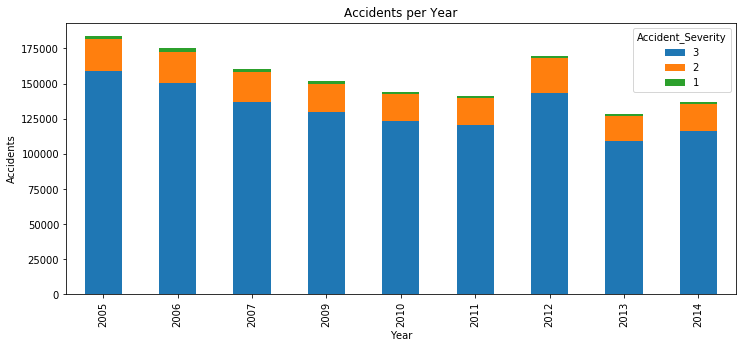

In [9]:
df2 = df.groupby([df.index.year, "Accident_Severity"]).size().unstack("Accident_Severity")

ax = df2[[3,2,1]].plot(kind="bar", stacked="True", figsize=(12,5))
ax.set(title="Accidents per Year", xlabel="Year", ylabel="Accidents")
plt.show()

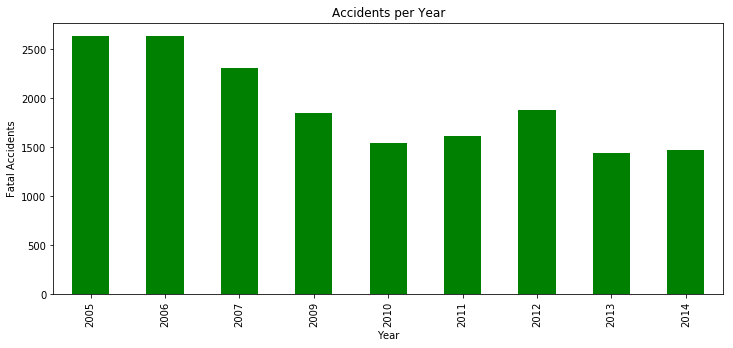

In [26]:
df2 = df[df["Accident_Severity"] == 1]
df2 = df2.groupby(df2.index.year).size()

ax = df2.plot(kind="bar", stacked="True", figsize=(12,5), color="green")
ax.set(title="Accidents per Year", xlabel="Year", ylabel="Fatal Accidents")
plt.show()

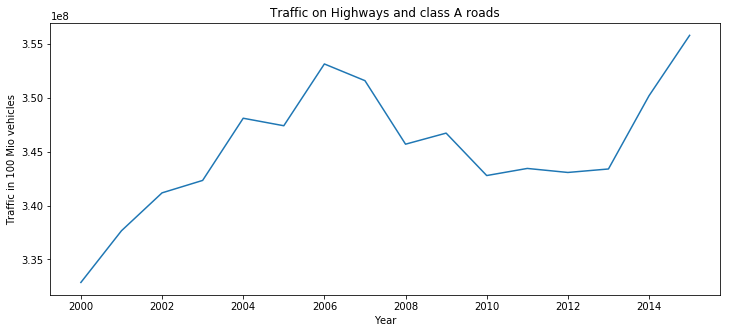

In [79]:
traffic = pd.read_csv("ukTrafficAADF.csv")
traffic = traffic[traffic["AADFYear"] != 2016]
ax = traffic.groupby("AADFYear")["AllMotorVehicles"].sum().plot(figsize=(12,5))
ax.set(title="Traffic on Highways and class A roads", xlabel="Year", ylabel="Traffic in 100 Mio vehicles")
plt.show()

#### Observations:
- downwards trend of accidents over the years
- 2012 outlier, cannot be explained by more traffic in that year (at least not on highways or class A roads)

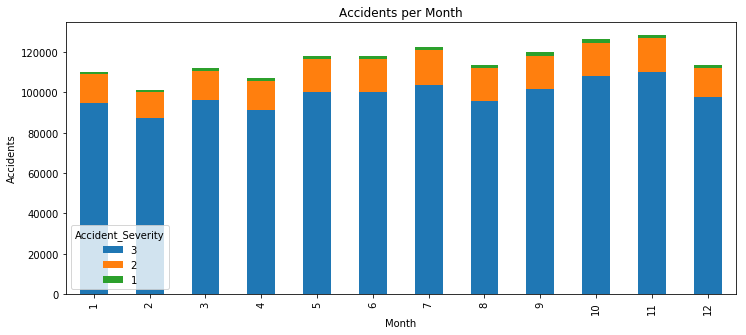

In [20]:
df2 = df.groupby([df.index.month, df.Accident_Severity]).size().unstack("Accident_Severity")

ax = df2[[3,2,1]].plot(kind="bar", stacked="True", figsize=(12,5))
ax.set(title="Accidents per Month", xlabel="Month", ylabel="Accidents")
plt.show()

#### Obersations:
- no big seasonality effect observable
- does not necessarily mean that there is no seasonality effect (more/less traffic during winter/summer)
- reasonable that there is not much seasonality since the UK suffers less from seasons (for example snow)

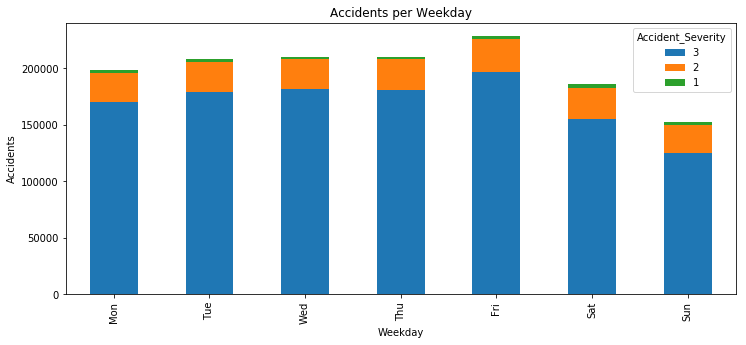

In [21]:
df2 = df.groupby([df.index.weekday, df.Accident_Severity]).size().unstack("Accident_Severity")

ax = df2[[3,2,1]].plot(kind="bar", stacked="True", figsize=(12,5))
ax.set_xticklabels(["Mon","Tue" , "Wed", "Thu", "Fri", "Sat", "Sun"])
ax.set(title="Accidents per Weekday", xlabel="Weekday", ylabel="Accidents")
plt.show()

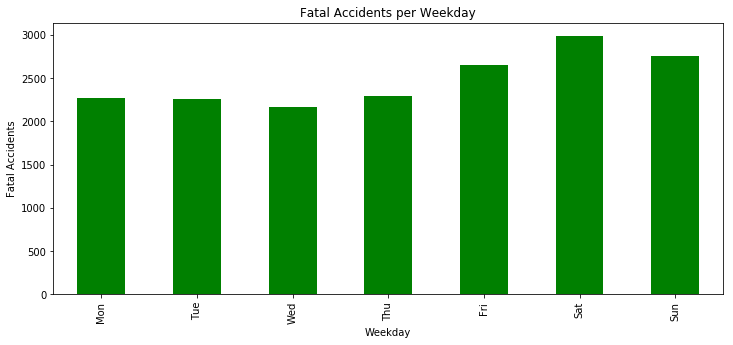

In [22]:
ax = df2[1].plot(kind="bar", figsize=(12,5), color = "green")
ax.set_xticklabels(["Mon","Tue" , "Wed", "Thu", "Fri", "Sat", "Sun"])
ax.set(title="Fatal Accidents per Weekday", xlabel="Weekday", ylabel="Fatal Accidents")
plt.show()

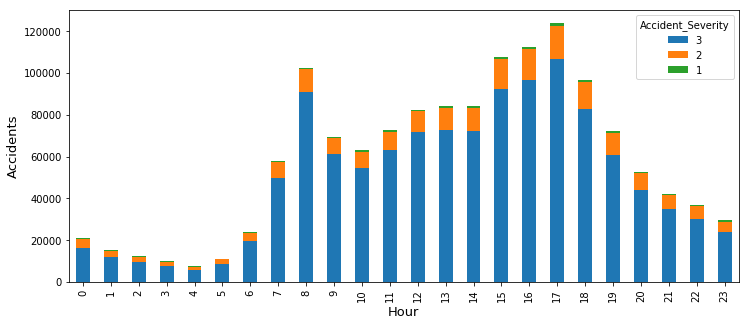

In [27]:
df2 = df.groupby([df.index.hour, df.Accident_Severity]).size().unstack("Accident_Severity")
ax = df2[[3, 2, 1]].plot(kind="bar", stacked=True, figsize=(12,5))
ax.set_xlabel("Hour", fontsize = 13) 
ax.set_ylabel("Accidents", fontsize = 13) 
plt.show()

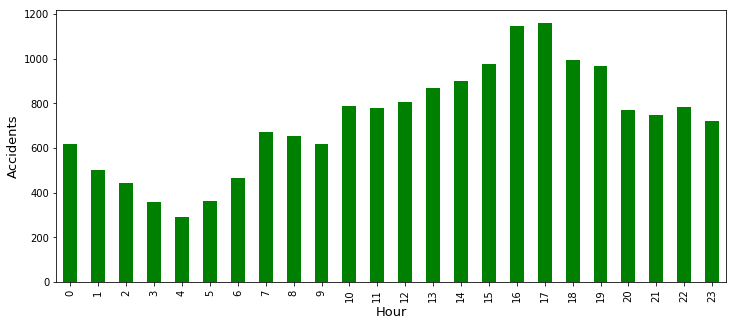

In [28]:
ax = df2[1].plot(kind="bar", figsize=(12,5), color="green")
ax.set_xlabel("Hour", fontsize = 13) 
ax.set_ylabel("Accidents", fontsize = 13) 
plt.show()

In [10]:
night = df[((df.index.hour >= 20) | (df.index.hour <= 5))]
day = df[((df.index.hour > 5) & (df.index.hour < 20))]

In [11]:
day.groupby("Accident_Severity").size() / day.shape[0]

Accident_Severity
1    0.010236
2    0.126512
3    0.863252
dtype: float64

In [12]:
night.groupby("Accident_Severity").size() / night.shape[0]

Accident_Severity
1    0.023391
2    0.170341
3    0.806268
dtype: float64

In [13]:
stats.ttest_ind(day["Accident_Severity"], night["Accident_Severity"])

Ttest_indResult(statistic=78.52382559815285, pvalue=0.0)

In [18]:
night_weekend = night[night.index.weekday >= 4]
night_weekday = night[night.index.weekday < 4]

In [19]:
night_weekend.groupby("Accident_Severity").size() / night_weekend.shape[0]

Accident_Severity
1    0.025616
2    0.177137
3    0.797248
dtype: float64

In [20]:
night_weekday.groupby("Accident_Severity").size() / night_weekday.shape[0]

Accident_Severity
1    0.020947
2    0.162877
3    0.816175
dtype: float64

In [21]:
stats.ttest_ind(night_weekend["Accident_Severity"], night_weekday["Accident_Severity"])

Ttest_indResult(statistic=-12.383943471887928, pvalue=3.2730820053316865e-35)

#### Observations:
- Weekday vs Weekend:
    - most accidents happen during the week (probably because of more traffic)
    - severe/fatal accidents are more likely to happen at the weekend than during the week (probably because of drunk driving)
- Time of Day:
    - most accidents happen during the rush hours when people go to or come from work due to more traffic
    - severe/fatal accidents are more likely to happen during the night than during the day (probably because of tiredness and drunk driving)

### Where do accidents happen? (Question 2)

In [22]:
heat_data_slight = df[df["Accident_Severity"] == 3][["Latitude", "Longitude"]].sample(10000)
heat_data_fatal = df[df["Accident_Severity"] == 1][["Latitude", "Longitude"]].sample(10000)

In [23]:
heat_data_slight = [[row["Latitude"], row["Longitude"]] for index, row in heat_data_slight.iterrows()]
heat_data_fatal = [[row["Latitude"], row["Longitude"]] for index, row in heat_data_fatal.iterrows()]

In [24]:
map_uk = folium.Map(location=[52, -0.5], zoom_start = 7) 

HeatMap(heat_data_slight, radius=5, blur=5).add_to(map_uk)

map_uk

In [25]:
map_uk = folium.Map(location=[52, -0.5], zoom_start = 7) 

HeatMap(heat_data_fatal, radius=5, blur=5).add_to(map_uk)

map_uk

In [26]:
urban_rural = df.groupby(["Urban_or_Rural_Area","Accident_Severity"]).size()
urban_rural.groupby(level=0).apply(lambda x: np.round(100 * x / np.sum(x), 2))

Urban_or_Rural_Area  Accident_Severity
1                    1                     0.70
                     2                    12.22
                     3                    87.08
2                    1                     2.28
                     2                    15.64
                     3                    82.08
dtype: float64

#### Observation:
- slight accidents seem to be more centered in urban areas
- fatal accidents seem to be more spread out over urban and rural areas
- effect might be explained by higher speed limits in rural areas and people paying less attention in remote rural areas

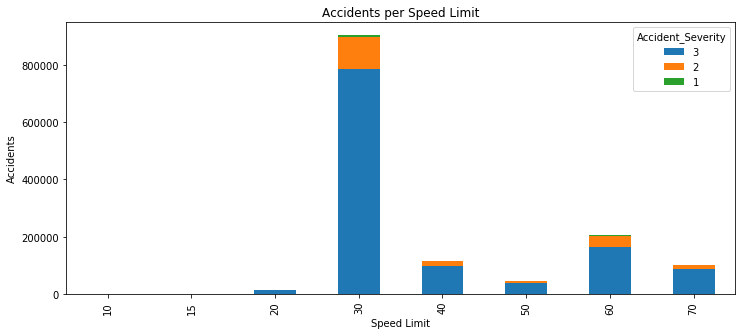

In [27]:
df2 = df.groupby([df.Speed_limit, df.Accident_Severity]).size().unstack("Accident_Severity")

ax = df2[[3,2,1]].plot(kind="bar", stacked="True", figsize=(12,5))
ax.set(title="Accidents per Speed Limit", xlabel="Speed Limit", ylabel="Accidents")
plt.show()

In [28]:
speed = df[df["Speed_limit"] >= 30].groupby(["Speed_limit", "Accident_Severity"]).size()
speed.groupby(level=0).apply(lambda x: np.round(100 * x / x.sum(), 2))

Speed_limit  Accident_Severity
30           1                     0.66
             2                    12.36
             3                    86.97
40           1                     1.43
             2                    13.51
             3                    85.05
50           1                     2.19
             2                    14.82
             3                    83.00
60           1                     3.04
             2                    18.32
             3                    78.63
70           1                     2.28
             2                    11.74
             3                    85.98
dtype: float64

In [29]:
acc_top10 = df.groupby("LSOA_of_Accident_Location").size().sort_values(ascending=False).head(10)

In [30]:
acc_top10

LSOA_of_Accident_Location
E01000004    2074
E01011365    1337
E01004736    1274
E01008440    1034
E01005131     871
E01002444     854
E01018648     841
E01004764     817
E01006650     720
E01023722     702
dtype: int64

In [31]:
map_uk = folium.Map(location=[53.5, -0.1], zoom_start = 6) 

for rank, (idx, val) in enumerate(acc_top10.iteritems(), 1):
    lsoa = df[df["LSOA_of_Accident_Location"] == idx]
    
    number_icon = BeautifyIcon(text_color='#000', border_color='transparent', icon='arrow-down', icon_shape='marker',
                                background_color='green', number=rank, inner_icon_style='font-size:12px;padding-top:-5px;')
    
    folium.Marker(
        location=lsoa[["Latitude", "Longitude"]].mean().values,
        popup=f"Nr. {rank}: {val} accidents",
        icon=number_icon
        ).add_to(map_uk)
    
    heat_data = [[row["Latitude"], row["Longitude"]] for index, row in lsoa.iterrows()]
    HeatMap(heat_data, radius=10, blur=10).add_to(map_uk)

map_uk

In [32]:
fatal_top10 = df[df["Accident_Severity"] == 1].groupby("LSOA_of_Accident_Location").size().sort_values(ascending=False).head(10)

In [33]:
fatal_top10

LSOA_of_Accident_Location
E01025808    15
E01031477    15
E01018648    14
E01001412    14
E01018597    14
E01027571    13
E01028000    13
E01026993    12
E01032010    12
E01019736    12
dtype: int64

In [34]:
map_uk = folium.Map(location=[53.5, -0.1], zoom_start = 6) 

for rank, (idx, val) in enumerate(fatal_top10.iteritems(), 1):
    lsoa = df[(df["LSOA_of_Accident_Location"] == idx) & (df["Accident_Severity"] == 1)]
    
    number_icon = BeautifyIcon(text_color='#000', border_color='transparent', icon='arrow-down', icon_shape='marker',
                                background_color='green', number=rank, inner_icon_style='font-size:12px;padding-top:-5px;')
    
    folium.Marker(
        location=lsoa[["Latitude", "Longitude"]].mean().values,
        popup=f"Nr. {rank}: {val} accidents",
        icon=number_icon
        ).add_to(map_uk)
    
    heat_data = [[row["Latitude"], row["Longitude"]] for index, row in lsoa.iterrows()]
    HeatMap(heat_data, radius=10, blur=10).add_to(map_uk)

map_uk

#### Observations:
- areas with the most accidents are in the city centres (although Birmingham seems to have fewer accidents than expected, maybe due to LSOA distribution)
- LSOA might not be a fair way to group accidents by in order to see in which area the most accidents happen:
    - roughly 1500 people live in each LSOA
    - this does not mean that in each LSOA there is roughly the same amount of traffic
- there does not seem to be an area where especially many fatal accidents happen (no outlier)

### Most Dangerous Street (Question 3)

#### Approach 1: Group by Street Number

In [35]:
most_dangerous = df.groupby("1st_Road_Number").size().sort_values(ascending=False).iloc[1:6]

In [36]:
map_uk = folium.Map(location=[51.5, -0.1], zoom_start = 6) 

for rank, (str_nr, val) in enumerate(most_dangerous.iteritems(), 1):
    area = df[df["1st_Road_Number"] == str_nr]
    
    number_icon = BeautifyIcon(text_color='#000', border_color='transparent', icon='arrow-down', icon_shape='marker',
                                background_color='green', number=rank, inner_icon_style='font-size:12px;padding-top:-5px;')
    
    folium.Marker(
        location=area[["Latitude", "Longitude"]].iloc[1000].values,
        popup=f"Nr. {rank}: {val} accidents",
        icon=number_icon
        ).add_to(map_uk)
    
    heat_data = [[row["Latitude"], row["Longitude"]] for index, row in area.sample(int(area.shape[0]/3)).iterrows()]
    HeatMap(heat_data, radius=10, blur=10).add_to(map_uk)

map_uk

#### Observations:
- long Roads/Highways
- a lot of missing values (~350k)
- maybe some wrong street assignments (spots way off the roads)

#### Approach 2: Look up street names

In [94]:
london = df[(df["Latitude"] > 51.48) & (df["Latitude"] < 51.55) & (df["Longitude"] > -0.17) & (df["Longitude"] < 0)]

In [95]:
geolocator = Nominatim(user_agent="specify_your_app_name_here")

In [96]:
location = geolocator.reverse("51.486552, -0.160590")

In [138]:
location.address

'28, Tite Street, Chelsea, Royal Borough of Kensington and Chelsea, London, Greater London, England, SW3, UK'

In [ ]:
addresses = []
count = 1
for idx, (lat, lon) in london[["Latitude", "Longitude"]].iterrows():
    try:
        addresses.append(geolocator.reverse(f"{lat}, {lon}").raw["address"].get("road", np.NaN))
    except:
        print(f"Failed at index {idx}")
    count += 1
    if count % 100 == 0:
        print(count)

100
200
Failed at index 2005-07-15 09:20:00
300
Failed at index 2005-08-04 17:00:00
Failed at index 2005-08-17 11:34:00
Failed at index 2005-08-25 00:41:00
Failed at index 2005-08-26 20:56:00
Failed at index 2005-08-16 08:00:00


#### Approach 3: to group accidents by streets, round the coordinates to a certain number of decimals

In [37]:
df["lon_rd"] = np.round(df.Longitude, decimals=2)
df["lat_rd"] = np.round(df.Latitude, decimals=3)

In [38]:
most_dangerous = df.groupby(["lon_rd", "lat_rd"]).size().sort_values(ascending=False).head(10)

In [39]:
map_uk = folium.Map(location=[51.5, -0.1], zoom_start = 6) 

for rank, ((lon, lat), val) in enumerate(most_dangerous.iteritems(), 1):
    area = df[(df["lat_rd"] == lat) & (df["lon_rd"] == lon)]
    
    number_icon = BeautifyIcon(text_color='#000', border_color='transparent', icon='arrow-down', icon_shape='marker',
                                background_color='green', number=rank, inner_icon_style='font-size:12px;padding-top:-5px;')
    
    folium.Marker(
        location=area[["Latitude", "Longitude"]].mean().values,
        popup=f"Nr. {rank}: {val} accidents",
        icon=number_icon
        ).add_to(map_uk)
    
    heat_data = [[row["Latitude"], row["Longitude"]] for index, row in area.iterrows()]
    HeatMap(heat_data, radius=10, blur=10).add_to(map_uk)

map_uk

## Accident Causes & Accident Prediction (Question 6 & 7)
- can't identify accident causes since there is no data from non-accidents
- can only identify causes for accident severity:
    - time of day
    - speed limit
    - urban/rural area

In [40]:
weather = df.groupby(["Weather_Conditions", "Accident_Severity"]).size()
weather2 = pd.concat([weather.groupby(level=0).apply(lambda x: np.round(100 * x / x.sum(), 2)), weather], axis=1)
weather2.columns = [["relative", "absolute"]]
weather2

relative absolute
Weather_Conditions         Accident_Severity                  
Fine with high winds       1                     1.79      296
                           2                    14.29     2368
                           3                    83.92    13902
Fine without high winds    1                     1.30    14573
                           2                    13.83   155204
                           3                    84.87   952641
Fog or mist                1                     2.19      167
                           2                    13.83     1055
                           3                    83.99     6409
Other                      1                     0.85      262
                           2                    10.74     3318
                           3                    88.41    27308
Raining with high winds    1                     1.31      233
                           2                    13.00     2311
                           3                    85.69    15237
Raining without high winds 1                     0.98     1567
                           2                    11.79    18857
                           3                    87.23   139495
Snowing with high winds    1                     0.64       10
                           2                    10.42      162
                           3                    88.93     1382
Snowing without high winds 1                     0.69       68
                           2                     9.21      904
                           3                    90.10     8845
Unknown                    1                     0.86      216
                           2                     9.44     2374
                           3                    89.70    22555

In [41]:
data = df[df.Speed_limit >= 30]

#### Random Forest

In [42]:
# creating time variable: Night, Peak, Off-Peak

data["Time"] = np.where((data.index.hour <= 6) | (data.index.hour >= 20), "Night", 
                     np.where((data.index.hour >= 10) & (data.index.hour <= 14), "Off-Peak", "Peak"))

C:\Users\Konny\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [43]:
data.Urban_or_Rural_Area.replace(2, 0, inplace=True)

C:\Users\Konny\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [44]:
y = data["Accident_Severity"].reset_index(drop=True)

In [45]:
X = data[["1st_Road_Class", "Speed_limit", "Weather_Conditions", "Urban_or_Rural_Area", "Time"]].reset_index(drop=True)

In [46]:
X_dum = pd.get_dummies(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.25, random_state=42)

In [48]:
clf = RandomForestClassifier(n_estimators=100,max_depth=4, random_state=28)

In [49]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=28, verbose=0, warm_start=False)

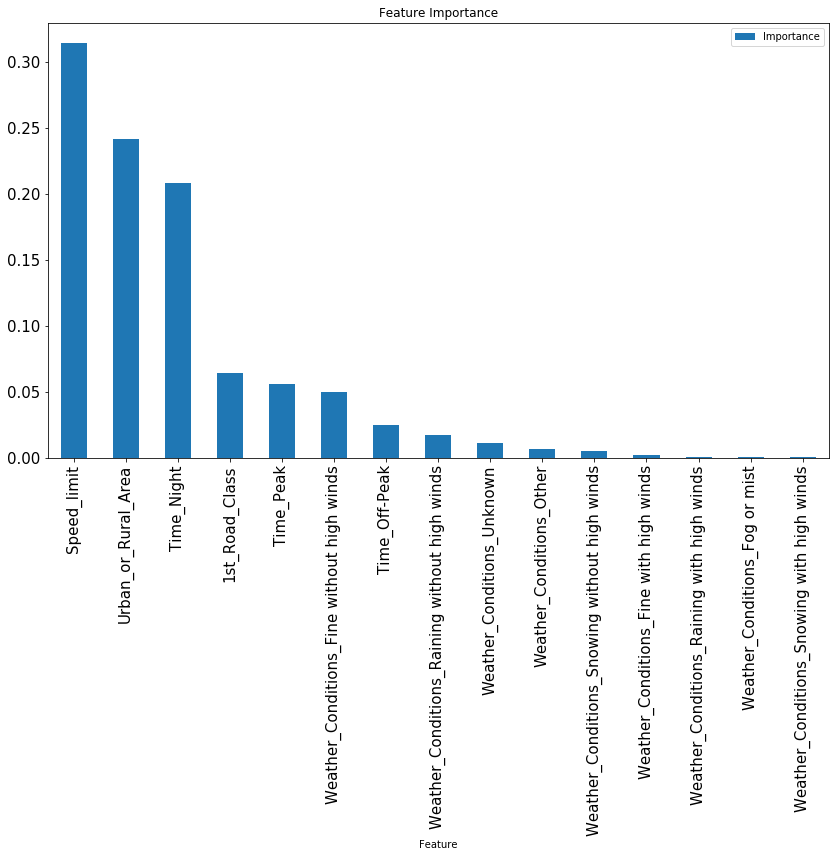

In [50]:
importance = sorted(zip(X_train.columns, clf.feature_importances_), key=itemgetter(1), reverse=True)
fe_imp = pd.DataFrame(importance, columns=["Feature", "Importance"]).set_index("Feature")
fe_imp.plot(figsize=(14, 8),kind="bar", title="Feature Importance", fontsize=15)
plt.show()

#### Observations:
- as mentioned before speed limit, urban/rural area and time of day are the most important factors of this dataset
- other possible causes (which cannot be examined with this dataset) are for example the driver's age or the type of car etc

In [224]:
rdf_preds = clf.predict_proba(X_test)

In [252]:
preds = pd.DataFrame(rdf_preds, columns=["pred_fatal", "pred_serious", "pred_slight"])
preds = pd.concat([preds, pd.get_dummies(y_test).reset_index(drop=True)], axis=1)
preds.rename(index=str, columns={1: "fatal", 2: "serious", 3: "slight"}, inplace=True)

preds.head()

,pred_fatal,pred_serious,pred_slight,fatal,serious,slight
0,0.007380,0.112453,0.880168,0,0,1
1,0.011936,0.137448,0.850616,0,0,1
2,0.022338,0.159999,0.817663,0,0,1
3,0.006864,0.123063,0.870074,0,1,0
4,0.012789,0.146445,0.840766,0,0,1


In [226]:
def rps(prob_fatal, prob_serious, fatal, serious):
    """
    Calculates the rank probability score
    prob_ -> predicted probability
    fatal, serious -> 0 or 1 for actual result
    The lower RPS the better
    """
    step1 = prob_fatal - fatal
    step2 = prob_serious - serious
    summe = step1 + step2
    rps = (step1 ** 2 + summe ** 2) / 2
    return rps

In [227]:
preds["rps_pred"] = rps(preds["pred_fatal"], preds["pred_serious"], preds["fatal"], preds["serious"])
preds["rps_dummy"] = rps(0, 0, preds["fatal"], preds["serious"])
preds["rps_mean"] = rps(0.012594, 0.133761, preds["fatal"], preds["serious"])

In [163]:
y_train.value_counts() / y_train.shape[0]

3    0.853645
2    0.133761
1    0.012594
Name: Accident_Severity, dtype: float64

In [228]:
preds.tail()

,pred_fatal,pred_serious,pred_slight,fatal,serious,slight,rps_pred,rps_dummy,rps_mean
343991,0.013089,0.136034,0.850876,0,0,1,0.011205,0.0,0.010789
343992,0.007402,0.120468,0.872130,0,0,1,0.008203,0.0,0.010789
343993,0.011611,0.138431,0.849958,0,0,1,0.011324,0.0,0.010789
343994,0.006464,0.123444,0.870092,0,0,1,0.008459,0.0,0.010789
343995,0.007815,0.119545,0.872640,0,0,1,0.008141,0.0,0.010789


#### Rank Probability Score

The RPS considers that for example a serious accident is closer to a fatal accident than an slight accident is to a fatal accident.
Formally:
$$RPS = \frac{1}{r-1}\sum_{i=1}^r\left(\sum_{j=1}^i p_j - \sum_{j=1}^i e_j\right)^2$$
with $r$ being the number of potential outcomes, $p_j$ the prediction and $e_j$ the actual outcome at position $j$.

In [229]:
preds["rps_pred"].mean()

0.06815165961014175

In [230]:
preds["rps_dummy"].mean()

0.07979307898929057

In [231]:
preds["rps_mean"].mean()

0.06890002043420361

In [232]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense

In [233]:
def loss_rps(y_true, y_pred):
    prob_h = y_pred[:, 0]
    prob_d = y_pred[:, 1]
    home = y_true[:, 0]
    draw = y_true[:, 1]

    step1 = prob_h - home
    step2 = prob_d - draw
    summe = step1 + step2
    return (step1 ** 2 + summe ** 2) / 2

In [234]:
from keras import backend as K
K.clear_session()

model = Sequential()
model.add(Dense(12, kernel_initializer="he_normal", input_shape=(15,)))
model.add(Activation("elu"))
model.add(Dropout(0.5))
model.add(Dense(8, kernel_initializer="he_normal"))
model.add(Activation("elu"))
model.add(Dropout(0.5))
model.add(Dense(3, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

model.compile(loss=loss_rps, optimizer='adam', metrics=['mae'])

In [235]:
y_train2 = pd.get_dummies(y_train)
y_test2 = pd.get_dummies(y_test)

In [236]:
history = model.fit(X_train, y_train2, epochs=10, batch_size = 256, validation_data=(X_test, y_test2), verbose=1)

Train on 1031988 samples, validate on 343996 samples
Epoch 1/10
1031988/1031988 [==============================] - 11s 11us/step - loss: 0.0777 - mean_absolute_error: 0.1573 - val_loss: 0.0686 - val_mean_absolute_error: 0.1671
Epoch 2/10
1031988/1031988 [==============================] - 9s 9us/step - loss: 0.0685 - mean_absolute_error: 0.1675 - val_loss: 0.0684 - val_mean_absolute_error: 0.1715
Epoch 3/10
1031988/1031988 [==============================] - 9s 9us/step - loss: 0.0683 - mean_absolute_error: 0.1676 - val_loss: 0.0683 - val_mean_absolute_error: 0.1622
Epoch 4/10
1031988/1031988 [==============================] - 10s 9us/step - loss: 0.0682 - mean_absolute_error: 0.1675 - val_loss: 0.0682 - val_mean_absolute_error: 0.1646
Epoch 5/10
1031988/1031988 [==============================] - 10s 10us/step - loss: 0.0681 - mean_absolute_error: 0.1674 - val_loss: 0.0682 - val_mean_absolute_error: 0.1705
Epoch 6/10
1031988/1031988 [==============================] - 10s 9us/step - loss:

In [237]:
def plot_history(history):
    mae = history.history['mean_absolute_error']
    val_mae = history.history['val_mean_absolute_error']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(mae) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, mae, 'b', label='Training mae')
    plt.plot(x, val_mae, 'r', label='Validation mae')
    plt.title('Training and validation MAE')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

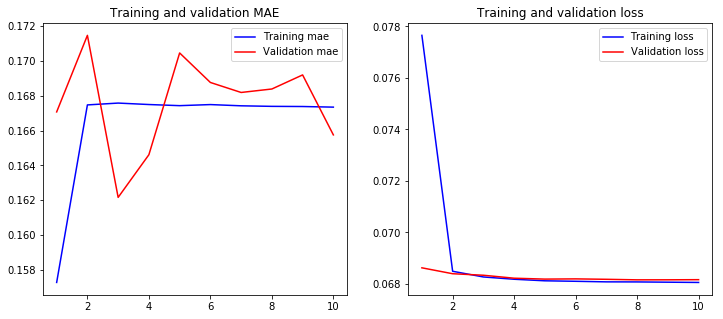

In [238]:
plot_history(history)

In [239]:
preds_ann = model.predict_proba(X_test)

In [240]:
preds_ann = pd.DataFrame(preds_ann, columns=["ann_fatal", "ann_serious", "ann_slight"])

In [261]:
preds.reset_index(inplace=True, drop=True)

In [264]:
preds = preds.merge(preds_ann, left_index=True, right_index=True)

In [265]:
preds["rps_ann"] = rps(preds["ann_fatal"], preds["ann_serious"], preds["fatal"], preds["serious"])

In [266]:
preds["rps_ann"].mean()

0.06818215548992157

### To Do:
- get non-accident data
- get driver information
- get vehicle information